# Deskripsi proyek

sebuah perusahaan ingin melakukan perubahan pada tampilan guna meningkatkan penjualan di sebuah toko daring, pada proyek kali ini saya mau melakukan analisis apakah dengan perubahan tersebut bisa meningkatkan penjualan di toko daring ini dengan melakukan A/B Testing

dataset yang digunakan:
- /datasets/hypotheses_us.csv
- /datasets/orders_us.csv
- /datasets/visits_us.csv


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [27]:
#memuat dataset

data_hypoteses = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/hypotheses_us.csv',sep=";")
data_orders = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/orders_us.csv')
data_visits = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/visits_us.csv')


In [28]:
#melihat masing masing data apakah ada nilai hilang atau tidak, dan melihat tipe datanya apakah sudah sesuai atau belum
data_hypoteses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [29]:
data_orders.info()
data_orders['date'] = pd.to_datetime(data_orders['date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [30]:
data_visits.info()
data_visits['date'] = pd.to_datetime(data_visits['date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


# Bagian 1. Memprioritaskan Hipotesis

### Menerapkan framework ICE untuk memprioritaskan hipotesis. Urutkan hipotesis tersebut dalam urutan prioritas menurun

In [31]:
data_hypoteses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [32]:
data_hypoteses['Hypothesis'].unique()

array(['Add two new channels for attracting traffic. This will bring 30% more users',
       'Launch your own delivery service. This will shorten delivery time',
       "Add product recommendation blocks to the store's site. This will increase conversion and average purchase size",
       'Change the category structure. This will increase conversion since users will find the products they want more quickly',
       'Change the background color on the main page. This will increase user engagement',
       'Add a customer review page. This will increase the number of orders',
       'Show banners with current offers and sales on the main page. This will boost conversion',
       'Add a subscription form to all the main pages. This will help you compile a mailing list',
       'Launch a promotion that gives users discounts on their birthdays'],
      dtype=object)

In [33]:
data_hypoteses['ICE'] = (data_hypoteses['Impact']*data_hypoteses['Confidence'])/data_hypoteses['Effort']
data_hypoteses['RICE'] = (data_hypoteses['Reach']*data_hypoteses['Impact']*data_hypoteses['Confidence'])/data_hypoteses['Effort']

In [34]:
# melihat prioritas pengubahan berdasarkan metode ICE (metode ini hanya berpengaruh pada internal perusahaan tanpa melibatkan pihak lain)
data_hypoteses.sort_values(by='ICE',ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


pada analisis ICE prioritas perubahan yang harus dilakukan adalah meluncurkan promosi dengan memberikan diskon pada user, metode ini ICE ini tidak mencakup customer dan biasanya hanya ada di tim internal perusahaan saja

In [35]:
#melihat prioritas perubahan berdasarkan metode RICE(metode ini berpengaruh pada pelanggan, atau perubahan mencakup/ berpengaruh pada pelanggan)
data_hypoteses.sort_values(by='RICE',ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


pada analisis RICE prioritas perubahan yang harus didahulukan adalah menambah subscription form untuk semua pages utama, tentunya perubahan ini mencakup dan berpengaruh bagi customer

### Bagian 2. Analisis A/B Testing

In [36]:
data_orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [37]:
data_visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


#### Gambarkan pendapatan kumulatif berdasarkan kelompok. Buatlah kesimpulan dan asumsinya.

In [38]:
#membuat tanggal kunjungan setiap group
dates_group=data_visits[['date','group']].drop_duplicates()
dates_group

,date,group
0,2019-08-01,A
1,2019-08-02,A
2,2019-08-03,A
3,2019-08-04,A
4,2019-08-05,A
...,...,...
57,2019-08-27,B
58,2019-08-28,B
59,2019-08-29,B
60,2019-08-30,B


In [39]:
#membuat agregasi setiap orders dan jumlah kunjungan pada data
orders_aggregate = dates_group.apply(
    lambda x: data_orders[np.logical_and(data_orders['date']<= x['date'],data_orders['group']==x['group'])].agg(
    {
        'date':'max',
        'group':'max',
        'transactionId':'nunique',
        'visitorId':'nunique',
        'revenue':'sum'
    }),axis=1).sort_values(by=['date','group'])

visits_aggregate = dates_group.apply(
    lambda x: data_visits[np.logical_and(data_visits['date']<=x['date'],data_visits['group']==x['group'])].agg(
    {
        'date':'max',
        'group':'max',
        'visits':'sum'
    }),axis=1).sort_values(by=['date','group'])

data_aggregate = orders_aggregate.merge(visits_aggregate,on=['date','group'])
data_aggregate = data_aggregate.rename(columns={'transactionId':'total_transaction','visitorId':'total_buyer'})
data_aggregate

,date,group,total_transaction,total_buyer,revenue,visits
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708
58,2019-08-30,A,545,493,63563.5,18037
59,2019-08-30,B,620,567,90736.3,18198
60,2019-08-31,A,557,503,64554.9,18736


terlihat pada pendapatannya group A lebih sedikit dibanding group B dan total transaksi dan visitor

In [40]:
aggregateA=data_aggregate[data_aggregate['group']=='A']
aggregateB=data_aggregate[data_aggregate['group']=='B']


<AxesSubplot:xlabel='date', ylabel='revenue'>

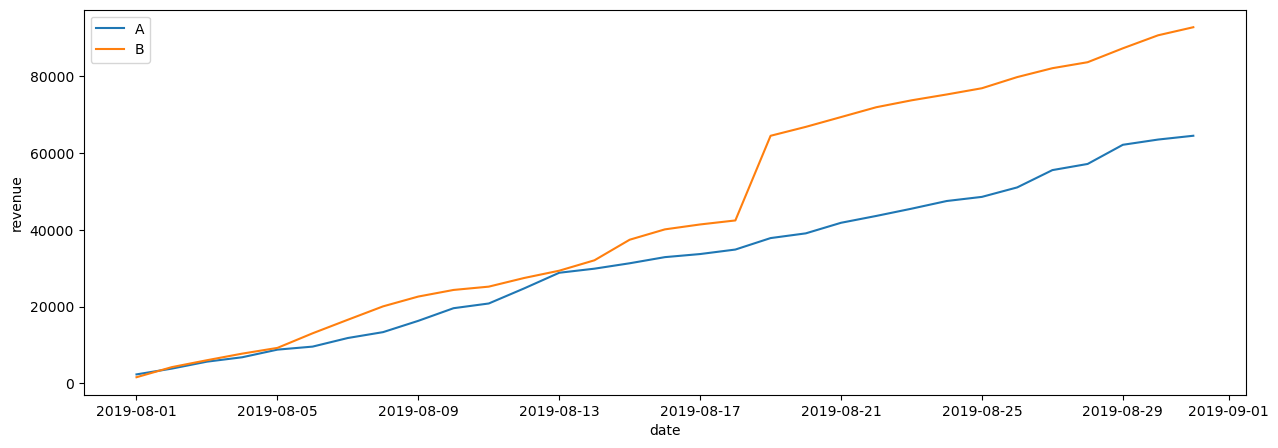

In [41]:
plt.figure(figsize=(15,5))
sns.lineplot(data=aggregateA ,x='date',y='revenue',label='A')
sns.lineplot(data=aggregateB ,x='date',y='revenue',label='B')

dari hasil analisis didapatkan bahwa revenue yang didapat dari kelompok B lebih banyak dibanding kelompok A, walaupun pada session tertentu revenue dari kelompok A ada yang lebih besar daripada kelompok B, tetapi jika dilihat secara keseluruhan revenue yang didapat dari kelompok B lebih banyak

#### Gambarkan ukuran pesanan rata-rata kumulatif berdasarkan kelompok. Buatlah kesimpulan dan asumsinya.

<AxesSubplot:xlabel='date'>

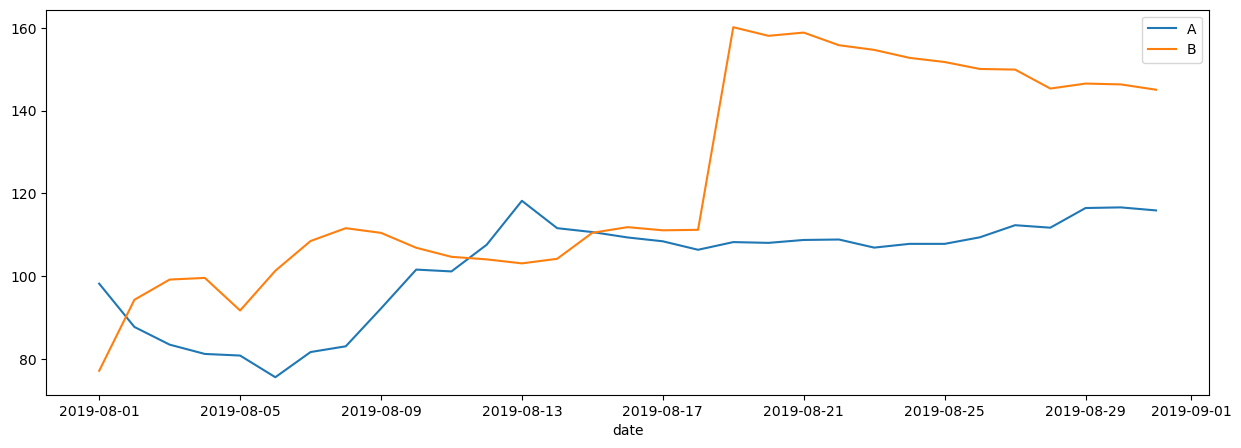

In [42]:
plt.figure(figsize=(15,5))
sns.lineplot(data=aggregateA ,x=aggregateA['date'],y=aggregateA['revenue']/aggregateA['total_transaction'],label='A')
sns.lineplot(data=aggregateB ,x=aggregateB['date'],y=aggregateB['revenue']/aggregateB['total_transaction'],label='B')

hasil rata-rata nya pun juga sama, kelompok B mendominasi jumlahnya dibanding kelompok A, ini berbanding lurus dengan revenue yang didapat tadi yang dimana revenue B lebih banyak dari revenue A dan rata-rata nya pun demikian rata-rata bulanan revenue kelompok B lebih banyak dibanding dengan kelompok A

#### Gambarkan perbedaan relatif untuk ukuran pesanan rata-rata kumulatif kelompok B yang dibandingkan dengan kelompok A. Buatlah kesimpulan dan asumsinya.

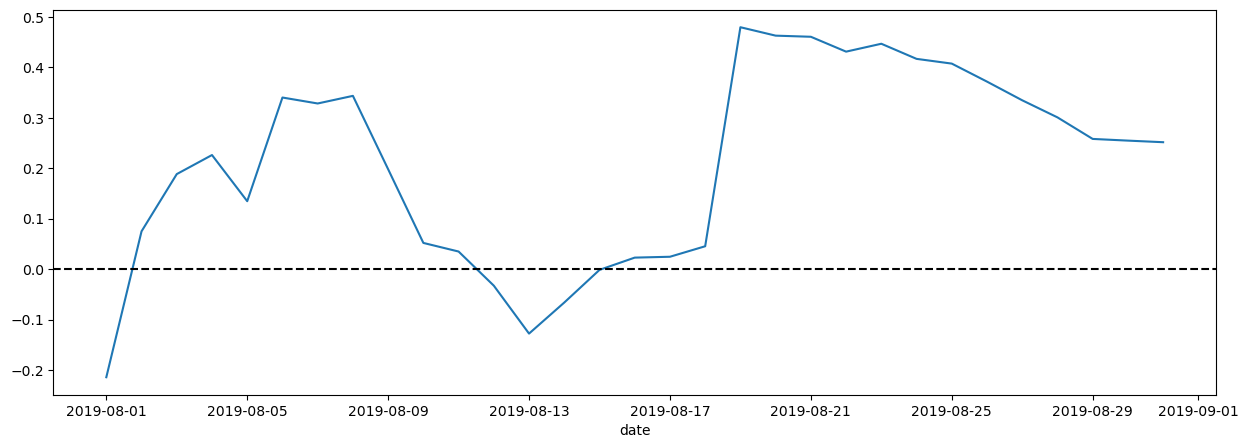

In [43]:
aggregated_relatif=aggregateA.merge(aggregateB,on='date',suffixes=['A','B'])
plt.figure(figsize=(15,5))
sns.lineplot(data=aggregated_relatif,x=aggregated_relatif['date'],
             y=(aggregated_relatif['revenueB']/aggregated_relatif['total_transactionB'])/
               (aggregated_relatif['revenueA']/aggregated_relatif['total_transactionA'])-1
            )
plt.axhline(y=0,color='black',linestyle='--')

walaupun total revenue dan rata-rata dari kelompok B mendominasi dari segi jumlahnya tetapi ada kala nya revenue dari kelompok A lebih banyak dibanding dengan kelompok B, misalnya pada periode 2019-08-01 revenue dari kelompok A lebih banyak sekitar 2% dibanding B 

### Hitung tingkat konversi setiap kelompok sebagai rasio pesanan terhadap jumlah kunjungan setiap hari. Buat grafik tingkat konversi harian dari kedua kelompok dan jelaskan perbedaannya. Buatlah kesimpulan dan asumsinya.

<AxesSubplot:xlabel='date'>

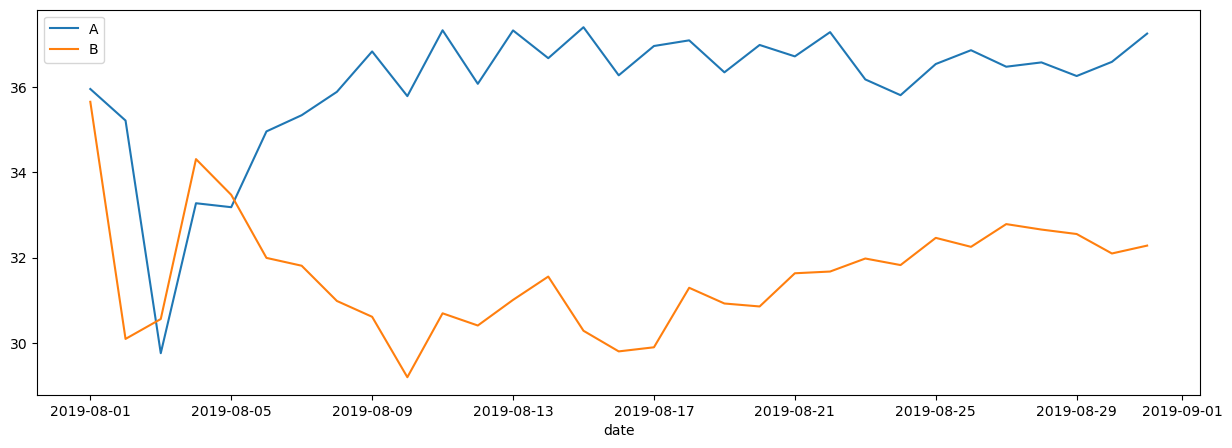

In [44]:
plt.figure(figsize=(15,5))
sns.lineplot(data = aggregateA,x=aggregateA['date'],y=aggregateA['visits']/aggregateA['total_buyer'],label='A')
sns.lineplot(data = aggregateB,x=aggregateB['date'],y=aggregateB['visits']/aggregateB['total_buyer'],label='B')

dari konversi justu dari kelompok A lebih banyak dari kelompok B artinya dari jumlah pelanggan yang visit pelanggan di kelompok A lebih banyak melakukan pembelilan/transaksi

### Buatlah diagram tebar (scatter chart) untuk jumlah pesanan per pengguna. Buatlah kesimpulan dan asumsinya.

<AxesSubplot:ylabel='transactionId'>

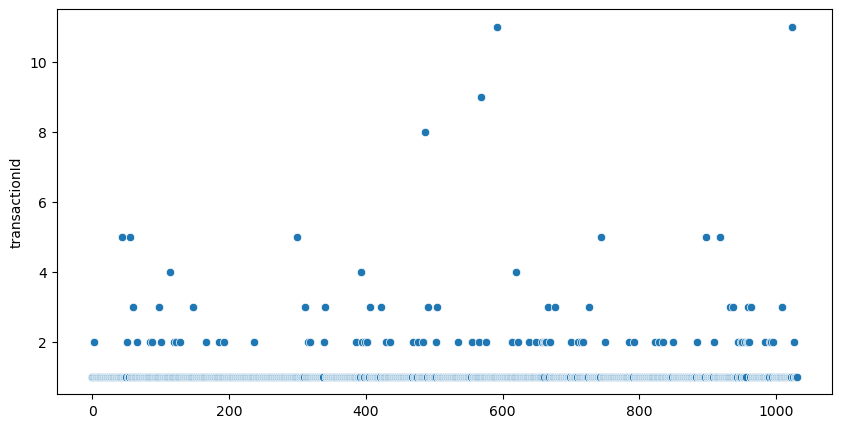

In [45]:
total_order = data_orders[['transactionId','visitorId']]
c = total_order.groupby('visitorId').agg({'transactionId':'nunique'}).reset_index()
#c
plt.figure(figsize=(10,5))
sns.scatterplot(data=c,x=range(len(c)),y='transactionId')


kebanyakan customer di kedua kelompok hanya melakukan 1 transaksi saja hanya sedikit yang melakukan sampai lebih dari 3 transaksi, hal tersebut dapat dilihat dari persebaran customer pada scatter plot, dot di scatter plot mewakili customer id, dan mayoritas persebaran ada di titik 1 yang artinya hanya membeli 1 barang dan sedikit sekali yang melakukan transaksi sampai diatasa 5 kali

#### Hitung persentil ke-95 dan ke-99 untuk jumlah pesanan per pengguna. Tentukan titik ketika suatu titik data berubah menjadi anomali.

In [46]:
np.percentile(c['transactionId'],[95,99])

array([2., 4.])

rata rata 95% pelanggan melakukan transaksi dibawah 2 

rata rata 99% pelanggan melakukan transaksi dibawah 4

#### Buatlah diagram tebar (scatter chart) untuk harga pesanan. Buatlah kesimpulan dan asumsinya.

<AxesSubplot:ylabel='revenue'>

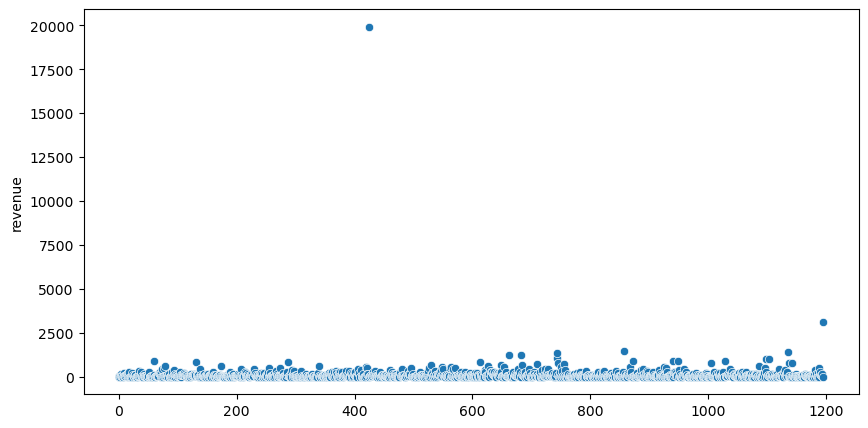

In [47]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=range(len(data_orders['transactionId'])),y=data_orders['revenue'])


rata rata pelanggan menghabiskan uang mereka untuk belanja di kisaran tidak lebih dari 2500$ dan hanya sedikit yang diatas 2500$

#### Hitung persentil ke-95 dan ke-99 untuk harga pesanan. Tentukan titik ketika suatu titik data berubah menjadi anomali.

In [48]:
np.percentile(data_orders['revenue'],[90,95,99])

array([282.48 , 435.54 , 900.904])

90% pelanggan menghabiskan uang mereka dibawah 282.48
95% pelanggan menghabiskan uang mereka dibawah 435.54
99% pelanggan menghabiskan uang mereka dibawah 900.904

#### Temukan signifikansi statistik perbedaan konversi antar kelompok menggunakan data mentah. Buatlah kesimpulan dan asumsinya.


#H0 = Konversi grup A sama dengan grup B

#H1 = Konversi grup A tidak sama dengan grup B

In [49]:
alpha = 0.05
a_conversion = data_orders[data_orders['group']=='A'].groupby('visitorId',as_index=False).agg({'transactionId': pd.Series.nunique})
b_conversion = data_orders[data_orders['group']=='B'].groupby('visitorId',as_index=False).agg({'transactionId':'nunique'})
a_conversion.columns=['visitorId','total_transaction']
b_conversion.columns=['visitorId','total_transaction']

pada bagian ini saya ingin melakukan pengelompokkan berdasarkan kelompok dengan  id visitor guna mengetahui transaksi yang mereka lakukan

In [69]:
#a_conversion['total_transaction']
conversionA = pd.concat([a_conversion['total_transaction'],
                        pd.Series(0, index=np.arange(data_visits[data_visits['group']=='A']['visits'].sum()-len(a_conversion['total_transaction'])))],axis=0)
conversionB = pd.concat([b_conversion['total_transaction'],
                        pd.Series(0, index=np.arange(data_visits[data_visits['group']=='B']['visits'].sum()-len(b_conversion['total_transaction'])))],axis=0)

result= st.mannwhitneyu(conversionA,conversionB)[1]
pvalue = result
if pvalue < alpha:
    print('dapat menolak H0')
else:
    print('todal dapat menolak H0')

print('nilai Pvalue adalah = ''{0:.3f}'.format (st.mannwhitneyu(conversionA,conversionB)[1]))
print('nilai konversi User Grup B =''{0:.3f}'.format(conversionB.mean()/conversionA.mean()-1))

dapat menolak H0
nilai Pvalue adalah = 0.017
nilai konversi User Grup B =0.138


Disini saya menguji apakah konversi kelompok a sama atau tidak dengan kelompok b menggunakan metode mannwhitneyu untuk mencari nilai pvaluenya dan nanti dibandingkan dengan nilai alpha yang saya set = 0.05 dan hasilnya adalah nilai konversi a dan b tidak sama terlihat pada asumsi ini kita bisa menolak H0 dan menerima H1 untuk lebih meyakinkan saya mencari nilai konversi grup B yang nilainya 0.138. Artinya konversi grup B lebih banyak 13% dibanding grup A

#### Temukan signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data mentah. Buatlah kesimpulan dan asumsinya.

H0 : Ukuran pesanan rata-rata antar kelompok sama

H1 : Ukuran pesanan rata-rata antar kelompok tidak sama

In [52]:
result = st.mannwhitneyu(data_orders[data_orders['group']=='A']['revenue'],data_orders[data_orders['group']=='B']['revenue'])[1]
pvalue = result

if alpha <0:
    print('Tidak bisa menolak H0,')
else :
    print('Dapat menolak H0')
    
print('nilai pvalue:', result)
print('total rata-rata perbedaan pesanan antara group B dibanding A=','{0:.2f}'.format(data_orders[data_orders['group']=='B']['revenue'].mean()/data_orders[data_orders['group']=='A']['revenue'].mean()-1))

Dapat menolak H0
nilai pvalue: 0.6915246773264736
total rata-rata perbedaan pesanan antara group B dibanding A= 0.25


pada uji hipotesis ini ditemukan ada perbedaan ratara pesanan antar kelompok dengan perbedaan sekitar 25 %, uji coba ini saya lakukan dengan menggunakan mannwhitneyu


#### Temukan signifikansi statistik perbedaan konversi antar kelompok menggunakan data yang telah difilter. Buatlah kesimpulan dan asumsinya.

H0 : konversi grup A dan B sama

H1 : konversi grup A dan B tidak sama

In [53]:
#filter berdasarkan user_id yang melakukan pesanan lebih dari 3 kali
#dan total pesanan lebih dari harga yang ditentukan

filtered_transaction = pd.concat([a_conversion[a_conversion['total_transaction']>2]['visitorId'],
                     b_conversion[b_conversion['total_transaction']>2]['visitorId']],axis=0)

filtered_revenue = pd.concat([data_orders[data_orders['revenue']>=350]['visitorId']],axis=0)
abnormal_user = pd.concat([filtered_transaction,filtered_revenue],axis=0).sort_values().drop_duplicates()

In [54]:
abnormal_user

568      113298937
1099     148427295
461      154576532
18       199603092
928      204675465
           ...    
627     4120364173
743     4133034833
60      4256040402
662     4266935830
886     4278982564
Name: visitorId, Length: 95, dtype: int64

pada bagian ini saya melakukan uji hipotesis tapi dengan data yang sudah difilter untuk menguji statistik pada 2 kelompok, yang saya filter adalah data pelanggan yang melakukan transaksi lebih dari 2 dan menghabiskan dana lebih dari atau sama dengan 350 maka tidak akan masuk dataset untuk pengujian, saya membuat variabel benama abnormal user, untuk menyimpan customer dengan 2 keadaan diatas, yang nantinya digunakan sebagai parameter agar menguji data selain abnormal_user ini

In [73]:
conversionA_filtered= pd.concat([a_conversion[np.logical_not(a_conversion['total_transaction'].isin(abnormal_user))]['total_transaction'],
                                pd.Series(0,index=np.arange(data_visits[data_visits['group']=='A']['visits'].sum()-len(a_conversion['total_transaction'])))                               
                                ],axis=0 )
conversionB_filtered= pd.concat([b_conversion[np.logical_not(b_conversion['total_transaction'].isin(abnormal_user))]['total_transaction'],
                                pd.Series(0,index=np.arange(data_visits[data_visits['group']=='B']['visits'].sum()-len(b_conversion['total_transaction'])))
                                ],axis=0)

result_filtered = st.mannwhitneyu(conversionA_filtered,conversionB_filtered)[1]
pvalue2 = result_filtered

if pvalue2 < alpha:
    print('TIdak dapat menolak H0,konversi grup A dan B sama')
else:
    print('Dapat menolak H0, konversi grup A dan B tidak sama')

    
print('nilai pvalue adalah',pvalue2)
print('nilai konversi grup B terhadap grup A adalah = ', '{0:.2f}'.format(conversionB_filtered.mean()/conversionA_filtered.mean()-1))
    

TIdak dapat menolak H0,konversi grup A dan B sama
nilai pvalue adalah 0.016792355056752608
nilai konversi grup B terhadap grup A adalah =  0.14


setelah diuji hipotesis menggunakan data yang sudah difilter ternyata konversi grup A dan grub B sama, terlihat dari uji hipotesis yang diberikan dan perbedaan konversi grup A dan grup B rata-ratanya hanya berbeda sedikit yaitu sekitar 14%

#### Temukan signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data yang telah difilter. Buatlah kesimpulan dan asumsinya.



H0 : Ukuran pesanan rata-rata antar kelompok sama

H1 : Ukuran pesanan rata-rata antar kelompok tidak sama

In [72]:
result_2 = st.mannwhitneyu(data_orders[np.logical_and
                                       (data_orders['group']=='A',
                                        np.logical_not(data_orders['visitorId'].isin(abnormal_user)))]['revenue'],
                           data_orders[np.logical_and
                                      (data_orders['group']=='B',
                                      np.logical_not(data_orders['visitorId'].isin(abnormal_user)))]['revenue']
                      
                          )[1]
pvalue2 = result_2
if pvalue2 < alpha :
    print('Tidak dapat menolak H0, Ukuran pesanan rata-rata antar kelompok sama')
else :
    print('Dapat menolak H0, Ukuran pesanan rata-rata antar kelompok tidak sama')
    
print('nilai pvalue adalah = ', pvalue2)
print('perbedaan pesanan antara grub a dan b adalah = ', '{0:.2f}'.format(
    data_orders[np.logical_and(data_orders['group']=='B', np.logical_not(data_orders['visitorId'].isin(abnormal_user)))]['revenue'].mean()/
    data_orders[np.logical_and(data_orders['group']=='A', np.logical_not(data_orders['visitorId'].isin(abnormal_user)))]['revenue'].mean()-1))

Dapat menolak H0, Ukuran pesanan rata-rata antar kelompok tidak sama
nilai pvalue adalah =  0.6941998188465728
perbedaan pesanan antara grub a dan b adalah =  -0.04


walaupun jumlah konversinya sama antara grub A dan grub B terhadap pelanggan yang melakukan visit lalu beli, ternyata rata-rata pendapatannya berbeda antara grup A dan grup B terlihat pada uji statistik yang dilakukan, walaupun berbedaanya antara a dan b tidak terlalu jauh untuk rata-ratanya sekitar 4%

### hasil pengujian 


Kesimpulan yang saya dapatkan setelah melakukan hipotesis adalah Menghentikan pengujian, serta mempertimbangkan salah satu kelompok sebagai pemimpin. Terlihat pada konversi pelanggan pada grup B yang mana lebih banyak pelanggan yang melakukan pembelian dari dia visit lalu order dibanding konversi pelanggan pada grup A yang lebih rendah dari dia visit lalu order, disini terlihat pelanggan dari grup B lebih banyak melakukan order dari pada pelanggan grup a, walaupun rata rata pembelian tidak berbeda mungkin ada beberapa faktor yang berpengaruh misalnya outlier terlihat setelah melakukan filter pada kelompok pelanggan perbedaan rata-rata konversi pada grup b terhadap a mendekati 0


Dari hasil analisis menggunakan metode ICE dan RICE hasilnya cukup berbeda,
kita tahu jika menggunakan metode RICE hasilnya kita melibatkan jangkauan
apakah ide ini berpengaruh besar pada pelanggan atau tidak, sebaliknya dengan
metode ICE kita tidak memikirkan jangkauan ide ini berpengaruh pada pelanggan atau 
tidak(lebih sederhana). Tetapi walaupun hipotesis diuji dengan 2 cara yang berbeda
(dengan metode ICE dan RICE) ada hipotesis yang nilai atau bobot prioritasnya cukup
tinggi di kedua metode dan harus diprioritaskan lebih dahulu. Bagi saya metode RICE
lebih diutamakan dahulu dibanding ICE karena RICE mencakup apakah suatu ide ini
berdampak bagus bagi pelanggan atau tidak. Bagi saya akan sedikit percuma jika
suatu ide bagus untuk sebuah toko online tetapi pelanggannya merasa tidak nyaman
saat menggunakan toko online yang dianggap wah tokonya sudah bagus dan sesuai harapan
bagi pembuatnya. Dari hasil pengujian dengan metode RICE dan ICE diatas terdapat hipotersis
yang nilainya tinggi di kedua hasil metode percobaan yaitu adalah:

'Add a subscription form to all the main pages. This will help you compile a mailing list'
hipotesis ini nilai bobotnya di kedua metode cukup tinggi untuk point pembobotan dan menurut saya 
hipotesis tersebut bisa jadi prioritas yang dikerjakan dahulu untuk mengingkatkan jumlah pelanggan yang
visit dan belanja ke toko online ini. Lalu untuk hipotesis lain jika saya urutkan mana yang paling
penting/prioritas untuk meningkatkan jumlah pelanggan ke toko online ini adalah :

'Add a subscription form to all the main pages. This will help you compile a mailing list'

'Add two new channels for attracting traffic. This will bring 30% more users'

'Show banners with current offers and sales on the main page. This will boost conversion',

'Add product recommendation blocks to the store's site. This will increase conversion and average purchase size'
